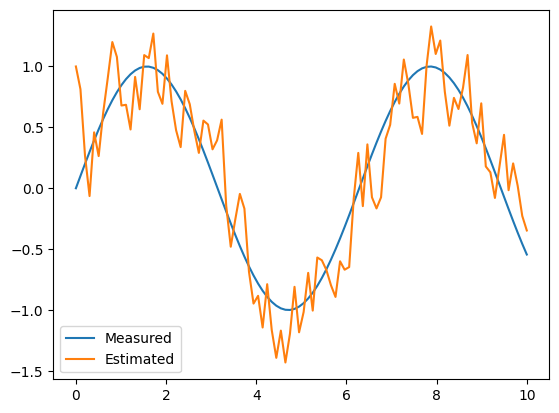

In [6]:
from filterpy.kalman import MerweScaledSigmaPoints, UnscentedKalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Define the kinetic parameters for the reactor
k = 0.3

# Define the state model for the reactor
def state_model(x, dt):
    return x + dt * (-k * x)

# Define the measurement model for the reactor
def measurement_model(x):

    return x+0.005*(np.random.normal(0,1))   #MODIFY

# Set up the initial conditions for the reactor
x0 = np.array([1.0])       #MODIFY
P0 = np.array([[1.0]])

# Set up the measurement data
t = np.linspace(0, 10, 100)
z_meas = np.sin(t)

# Initialize the UKF parameters
points = MerweScaledSigmaPoints(n=1, alpha=0.1, beta=2, kappa=0)
ukf = UnscentedKalmanFilter(dim_x=1, dim_z=1, dt=0.1, points=points, fx=state_model, hx=measurement_model)
ukf.x = x0 +0.1*(np.random.normal(0,1))    #MODIFY
ukf.P = P0

# Define the arrays to store the results
x = np.zeros((1, len(t)))
x[:, 0] = x0

# Run the UKF
for i in range(1, len(t)):
    # Predict and update with UKF
    ukf.predict()
    hx = measurement_model(ukf.x)
    y = z_meas[i] - hx
    ukf.update(z_meas[i])

    # Store the result
    x[:, i] = ukf.x

# Plot the results
plt.plot(t, z_meas, label='Measured')
plt.plot(t, x[0], label='Estimated')
plt.legend()
plt.show()


(100,)


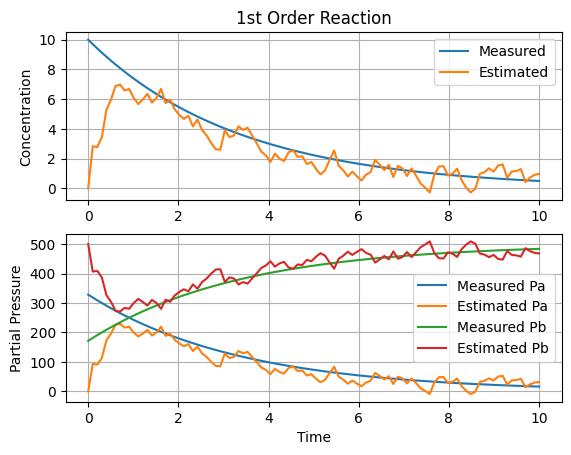

In [7]:
from filterpy.kalman import MerweScaledSigmaPoints, UnscentedKalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Define the kinetic parameters for the reactor
k = 0.3

# Define the state model for the reactor
def state_model(x, dt):
    return x + dt * (-k * x)

# Define the measurement model for the reactor
def measurement_model(x):

    return x+0.05*(np.random.normal(0,1))   #MODIFY

# Set up the initial conditions for the reactor
x0 = np.array([0.0])       #MODIFY
P0 = np.array([[1.0]])

# Set up the measurement data
t = np.linspace(0, 10, 100)
z_meas = 10*np.exp(-k*t)

# Initialize the UKF parameters
points = MerweScaledSigmaPoints(n=1, alpha=0.1, beta=2, kappa=0)
ukf = UnscentedKalmanFilter(dim_x=1, dim_z=1, dt=0.1, points=points, fx=state_model, hx=measurement_model)
ukf.x = x0 +5*(np.random.normal(0,1))    #MODIFY
ukf.P = P0

# Define the arrays to store the results
x = np.zeros((1, len(t)))
x[:, 0] = x0

# Run the UKF
for i in range(1, len(t)):
    # Predict and update with UKF
    ukf.predict()
    hx = measurement_model(ukf.x)
    y = z_meas[i] - hx
    ukf.update(z_meas[i])

    # Store the result
    x[:, i] = ukf.x
print(z_meas.shape)

#Let total pressure be 500
# Plot the results
plt.subplot(2, 1, 1)
plt.plot(t, z_meas, label='Measured')
plt.plot(t, x[0], label='Estimated')
plt.title("1st Order Reaction")
plt.ylabel("Concentration")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, z_meas * 32.84, label='Measured Pa')
plt.plot(t, x[0] * 32.84, label='Estimated Pa')
plt.plot(t, 500-(z_meas * 32.84), label='Measured Pb')
plt.plot(t, 500-(x[0] * 32.84), label='Estimated Pb')
plt.xlabel("Time")
plt.ylabel("Partial Pressure")
plt.legend()
plt.grid()

plt.show()


(100,)


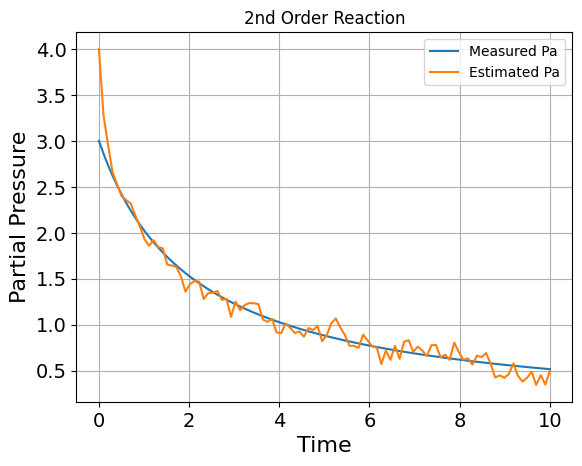

In [8]:
from filterpy.kalman import MerweScaledSigmaPoints, UnscentedKalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Define the kinetic parameters for the reactor
k = 0.16

# Define the state model for the reactor
def state_model(x, dt):
    return x + dt * (-k * x**2)

# Define the measurement model for the reactor
def measurement_model(x):

    return x+0.001*(np.random.normal(0,1))   #MODIFY

# Set up the initial conditions for the reactor
x0 = np.array([4.0])       #MODIFY
P0 = np.array([[1.0]])

# Set up the measurement data
t = np.linspace(0, 10, 100)
# z_meas = 3*np.exp(-k*t)
z_meas = (3/(1+3*k*t))

# Initialize the UKF parameters
points = MerweScaledSigmaPoints(n=1, alpha=0.1, beta=2, kappa=0)
ukf = UnscentedKalmanFilter(dim_x=1, dim_z=1, dt=0.1, points=points, fx=state_model, hx=measurement_model)
ukf.x = x0 +0.001*(np.random.normal(0,1))    #MODIFY
ukf.P = P0

# Define the arrays to store the results
x = np.zeros((1, len(t)))
x[:, 0] = x0

# Run the UKF
for i in range(1, len(t)):
    # Predict and update with UKF
    ukf.predict()
    hx = measurement_model(ukf.x)
    y = z_meas[i] - hx
    ukf.update(z_meas[i])

    # Store the result
    x[:, i] = ukf.x
print(z_meas.shape)

#Let total pressure be 500
# Plot the results
# plt.subplot(2, 1, 1)
plt.plot(t, z_meas, label='Measured Pa')
plt.plot(t, x[0], label='Estimated Pa')
plt.title("2nd Order Reaction")
plt.ylabel("Partial Pressure", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid()



[3.94161705 4.00000622 3.93746893 3.83762185 3.89198019 3.87323369
 3.91703629 3.84183571 3.71613406 3.6976059  3.75256695 3.61468924
 3.69109385 3.61793311 3.5407273  3.61606152 3.50960025 3.52751492
 3.53758554 3.51319645 3.48157851 3.41186816 3.42811699 3.4582002
 3.39038081 3.34603197 3.3643881  3.33063153 3.27053164 3.29928074
 3.26142478 3.22931863 3.172641   3.2196228  3.13522076 3.25124524
 3.08533127 3.11091016 3.19243703 3.07528007 2.99571141 3.05121682
 2.96943459 3.04769892 3.03613537 3.05431391 3.01352023 2.91965747
 2.93070331 2.94867607 2.87206529 2.79212229 2.85427063 2.85635162
 2.85980289 2.84936999 2.92843883 2.78164795 2.74553409 2.80895971
 2.76012571 2.70740719 2.75543904 2.77892121 2.74617633 2.73803555
 2.69003575 2.73241032 2.59640509 2.66753551 2.59573674 2.66624026
 2.71739323 2.57877101 2.58074314 2.7385101  2.55917025 2.57671755
 2.52101982 2.56501893 2.60721103 2.5643109  2.51840426 2.57849379
 2.46102504 2.517099   2.45400698 2.63017494 2.55288585 2.40458

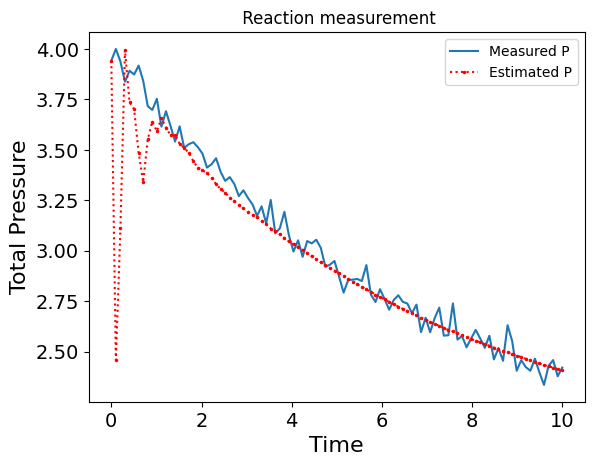

In [9]:
import numpy as np
from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints
from numpy.random import randn
import matplotlib.pyplot as plt


def fx(x, dt):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    F = np.array([[1-0.16*dt, 0.16*dt],
                  [0, 1]], dtype=float)
    return np.dot(F, x)

def hx(x):
    # measurement function - convert state into a measurement
    # where measurements are [x_pos]
    return np.array([x[0]+x[1] + 0.0001*np.random.randn()])

dt = 0.1
# create sigma points to use in the filter. This is standard for Gaussian processes
points = MerweScaledSigmaPoints(2, alpha=.1, beta=2., kappa=-1)

kf = UnscentedKalmanFilter(dim_x=2, dim_z=1, dt=dt, fx=fx, hx=hx, points=points)
kf.x = np.array([3., 1.]) # initial state
kf.P *= 36 # initial uncertainty
z_std = 0.1
kf.R = np.diag([z_std**2]) # 1 standard deviation

# Define the process noise covariance matrix
q = 0.001
k = 0.16
kf.Q = np.array([[q*dt**3/3, q*dt**2/2],
                 [q*dt**2/2, q*dt]])

t = np.linspace(0, 10, 100)
zs = 2+2*np.exp(-k*t)+np.random.randn( len(t))*0.05


print(zs)



x_ = np.zeros((2, len(zs)))
x_[:, 0] = np.transpose([3., 1.])
 # measurements
i = 0
for z in zs:
    kf.predict()
    kf.update(z)
    # print(kf.x, 'log-likelihood', kf.log_likelihood)
    x_[:, i] = kf.x
    i+= 1

plt.plot(t, zs, label='Measured P')
plt.plot(t, x_[0]+1, 'o:r', ms = 1.5 , label='Estimated P')

plt.title(" Reaction measurement")
plt.ylabel("Total Pressure", fontsize=16)
plt.xlabel("Time", fontsize=16)

plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


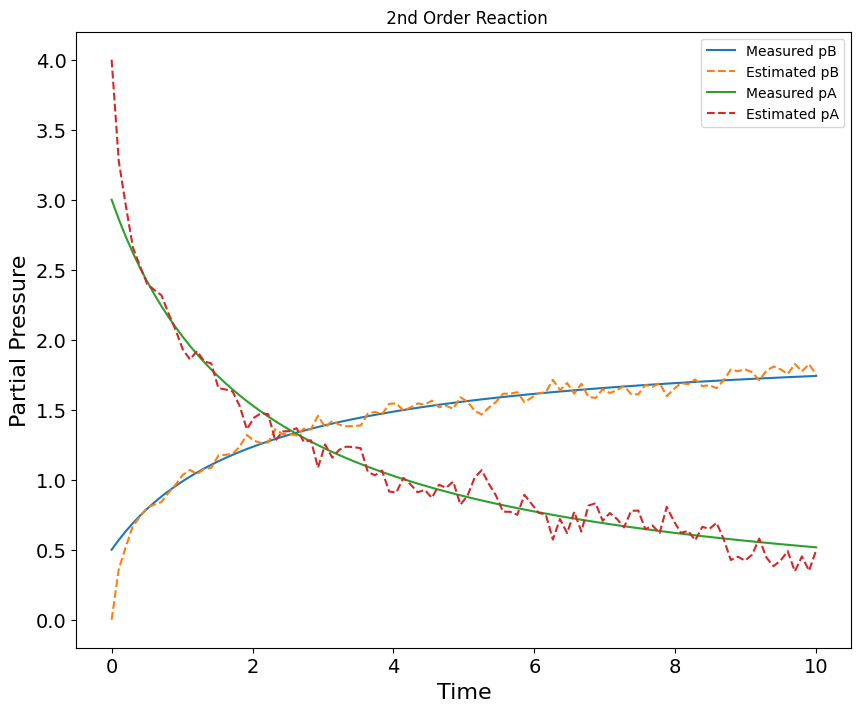

In [10]:
plt.figure(figsize = (10,8))

plt.plot(t,(4 -z_meas)/2 ,label='Measured pB')
abc = 4 - np.array(x).reshape(100,)

plt.plot(t,abc/2 ,label='Estimated pB', linestyle='dashed' )
plt.plot(t, z_meas, label='Measured pA')
plt.plot(t, x[0], label='Estimated pA', linestyle='dashed')
plt.title(" 2nd Order Reaction")
plt.ylabel("Partial Pressure", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend()
# plt.grid()